# Walmart Business case study

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import poisson
from scipy.stats import binom
import scipy.stats as stats
import math

# 1. Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset
* The data type of all columns in the “customers” table.
Hint: We want you to display the data type of each column present in the
dataset.
* You can find the number of rows and columns given in the dataset
Hint: You can find the shape of the dataset.
* Check for the missing values and find the number of missing values in each
column

# 2. Detect Null values and outliers
* Find the outliers for every continuous variable in the dataset
Hint: Use boxplots to find the outliers in the given dataset
* Remove/clip the data between the 5 percentile and 95 percentile
Hint: You can use np.clip() for clipping the data

In [2]:
df = pd.read_csv(r"C:\Users\Dhrubo\Desktop\walmart_data.csv")

In [3]:
Data = df

In [4]:
Data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [5]:
row, col = Data.shape

In [6]:
row, col

(550068, 10)

In [7]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [8]:
Data.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

Changing Data type of coloumn 'Stay_In_Current_City_Years' from object to int64 by changing 4+ to 4 for 
easy analysis on later stage

In [9]:
def Stay_In_Current_City_Years(y):
    if y=='4+':
        return 4
    else:
        return y
    
Data['Stay_In_Current_City_Years'] = Data['Stay_In_Current_City_Years'].apply(Stay_In_Current_City_Years)

In [10]:
Data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4,0,8,7969


In [11]:
Data['Stay_In_Current_City_Years']=Data['Stay_In_Current_City_Years'].astype('int64')

In [12]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  int64 
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 42.0+ MB


In [13]:
Data.describe()

,User_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,1.858418,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,1.289443,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,1.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,2.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,3.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,4.000000,1.000000,20.000000,23961.000000


In [14]:
Data.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068.000000,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,NaN,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,1.858418,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,1.289443,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,1.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,2.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,3.000000,1.000000,8.000000,12054.000000


# Insight
* No Missing Data, No Null data. Number of Rows and column are 550068, 10 respectively.

   * Male are the top purchaser.
   * Top purchasing age group is 26-35.
   * People who are the top purchaser belongs to city 'B'.
   * Mean purchase amount 9263.9 amd max purahcse amount 23961. As mean way less than max chances of outlier in this data.

# Non graphical analysis

In [15]:
Data.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

In [16]:
gender_count=Data['Gender'].value_counts()
gender_count

M    414259
F    135809
Name: Gender, dtype: int64

In [17]:
percentage_gender = Data['Gender'].value_counts(normalize=True)
percentage_gender

M    0.753105
F    0.246895
Name: Gender, dtype: float64

In [18]:
age_count=Data['Age'].value_counts()
age_count

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [19]:
percentage_age = Data['Age'].value_counts(normalize=True)
percentage_age

26-35    0.399200
36-45    0.199999
18-25    0.181178
46-50    0.083082
51-55    0.069993
55+      0.039093
0-17     0.027455
Name: Age, dtype: float64

In [20]:
occ_count=Data['Occupation'].value_counts()
occ_count

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [21]:
percentage_occ = Data['Occupation'].value_counts(normalize=True)
percentage_occ

4     0.131453
0     0.126599
7     0.107501
1     0.086218
17    0.072796
20    0.061014
12    0.056682
14    0.049647
2     0.048336
16    0.046123
6     0.037005
3     0.032087
10    0.023506
5     0.022137
15    0.022115
11    0.021063
19    0.015382
13    0.014049
18    0.012039
9     0.011437
8     0.002811
Name: Occupation, dtype: float64

In [22]:
city_cat_count=Data['City_Category'].value_counts()
city_cat_count

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [23]:
percentage_city_cat = Data['City_Category'].value_counts(normalize=True)
percentage_city_cat

B    0.420263
C    0.311189
A    0.268549
Name: City_Category, dtype: float64

In [24]:
Stay_In_Current_City_Years_count=Data['Stay_In_Current_City_Years'].value_counts()
Stay_In_Current_City_Years_count

1    193821
2    101838
3     95285
4     84726
0     74398
Name: Stay_In_Current_City_Years, dtype: int64

In [25]:
percentage_Stay_In_Current_City_Years = Data['Stay_In_Current_City_Years'].value_counts(normalize=True)
percentage_Stay_In_Current_City_Years

1    0.352358
2    0.185137
3    0.173224
4    0.154028
0    0.135252
Name: Stay_In_Current_City_Years, dtype: float64

In [26]:
Marital_Status_count=Data['Marital_Status'].value_counts()
Marital_Status_count

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [27]:
percentage_Marital_Status = Data['Marital_Status'].value_counts(normalize=True)
percentage_Marital_Status

0    0.590347
1    0.409653
Name: Marital_Status, dtype: float64

In [28]:
Product_Category_count=Data['Product_Category'].value_counts()
Product_Category_count

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

In [29]:
percentage_Product_Category = Data['Product_Category'].value_counts(normalize=True)
percentage_Product_Category

5     0.274390
1     0.255201
8     0.207111
11    0.044153
2     0.043384
6     0.037206
3     0.036746
4     0.021366
16    0.017867
15    0.011435
13    0.010088
10    0.009317
12    0.007175
7     0.006765
18    0.005681
20    0.004636
19    0.002914
14    0.002769
17    0.001051
9     0.000745
Name: Product_Category, dtype: float64

# Insights:

* Total 7 Age group, 21 different occupation, 3 different city category and 20 product category available in this data set.
* Male are 75% and female are 25%.
* Max people are in age group 26-35 i.e 40%
* 13.1% (max) people are in occupation 4.
* 42% (max) people are from city category B.
* max stay in city is for 1 year which is 35.2%.
* Most of the product category sold is 5 which is 27.4%.
* Total 5891 unique user id in this data set.


# Graphical analysis
## Univariate

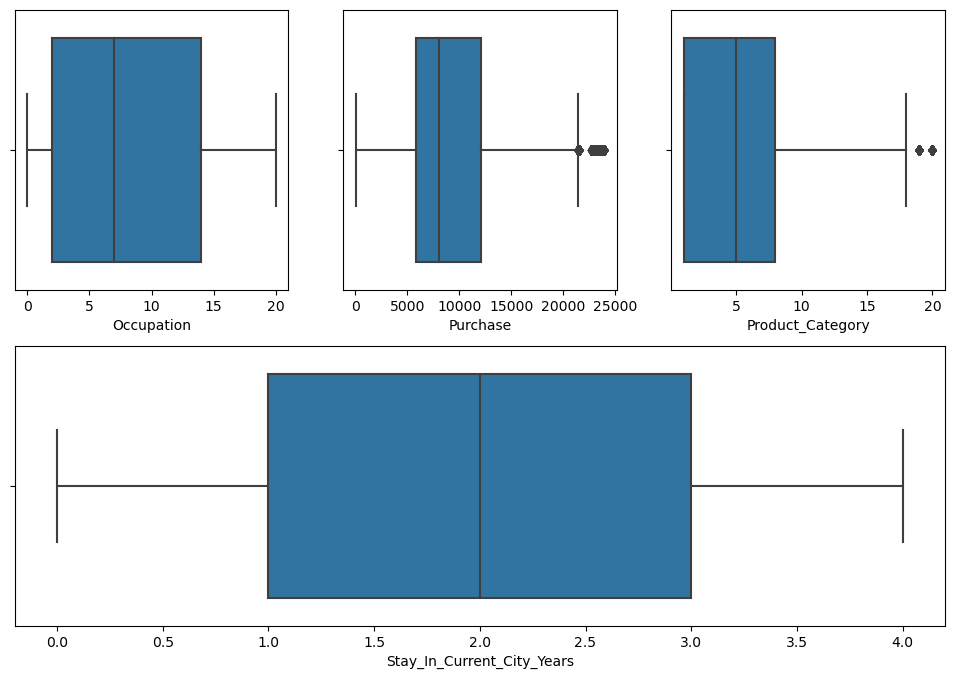

In [30]:
plt.figure(figsize=(12,8))
plt.subplot(2,3,1)
sns.boxplot(x=Data['Occupation'])

plt.subplot(2,3,2)
sns.boxplot(x=Data['Purchase'])

plt.subplot(2,3,3)
sns.boxplot(x=Data['Product_Category'])

plt.subplot(2,1,2)
sns.boxplot(x=Data['Stay_In_Current_City_Years'])
plt.show()

# Insights:
* The occupation & Stay_In_Current_City_Years does not have any outliers.
* Purchases have outliers.
* Product categories have some outliers where most of the products are purchased in the range 1 to 8 with mean 5.

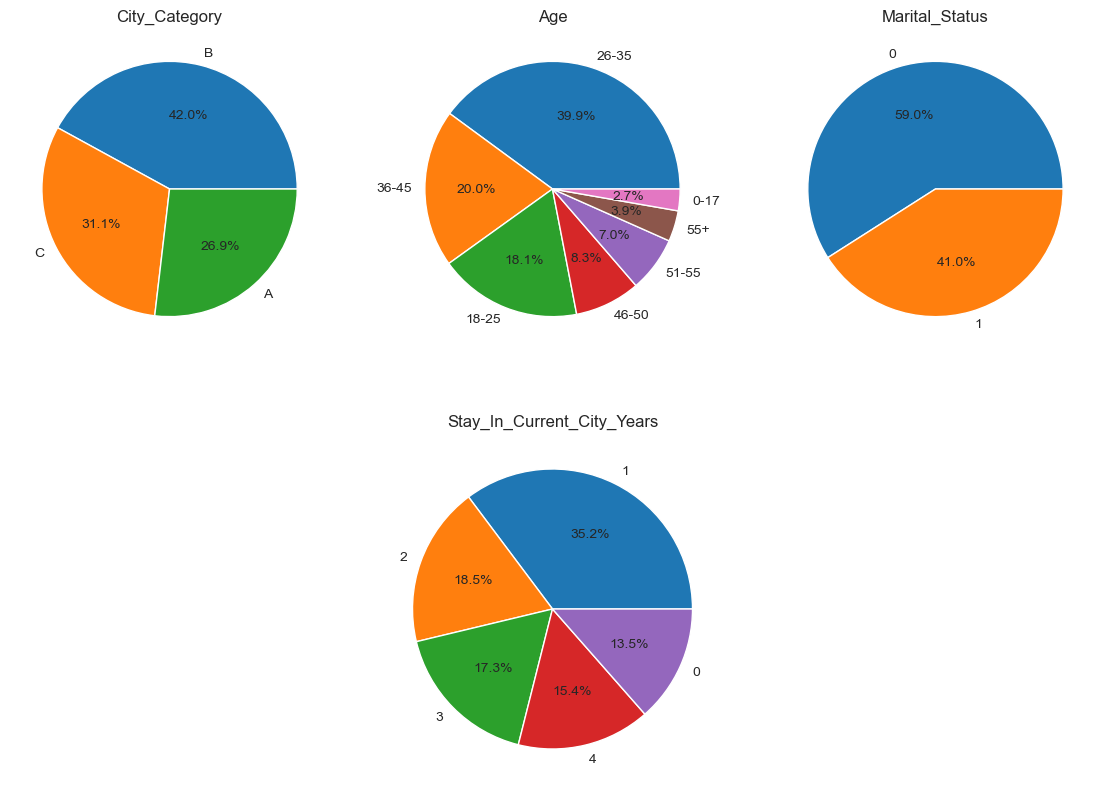

In [31]:
sns.set_style("whitegrid")
plt.figure(figsize=(14,10))
plt.subplot(2,3,1)
plt.pie(Data['City_Category'].value_counts(), labels=Data['City_Category'].value_counts().index, autopct='%1.1f%%')
plt.title('City_Category')

plt.subplot(2,3,2)
plt.pie(Data['Age'].value_counts(), labels=Data['Age'].value_counts().index, autopct='%1.1f%%')
plt.title('Age')

plt.subplot(2,3,3)
plt.pie(Data['Marital_Status'].value_counts(), labels=Data['Marital_Status'].value_counts().index, autopct='%1.1f%%')
plt.title('Marital_Status')

plt.subplot(2,1,2)
plt.pie(Data['Stay_In_Current_City_Years'].value_counts(), labels=Data['Stay_In_Current_City_Years'].value_counts().index, autopct='%1.1f%%')
plt.title('Stay_In_Current_City_Years')
plt.show()

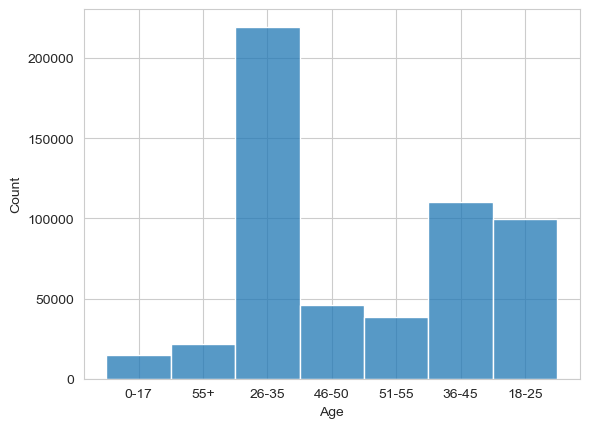

In [32]:
sns.histplot(Data['Age'])
plt.show()

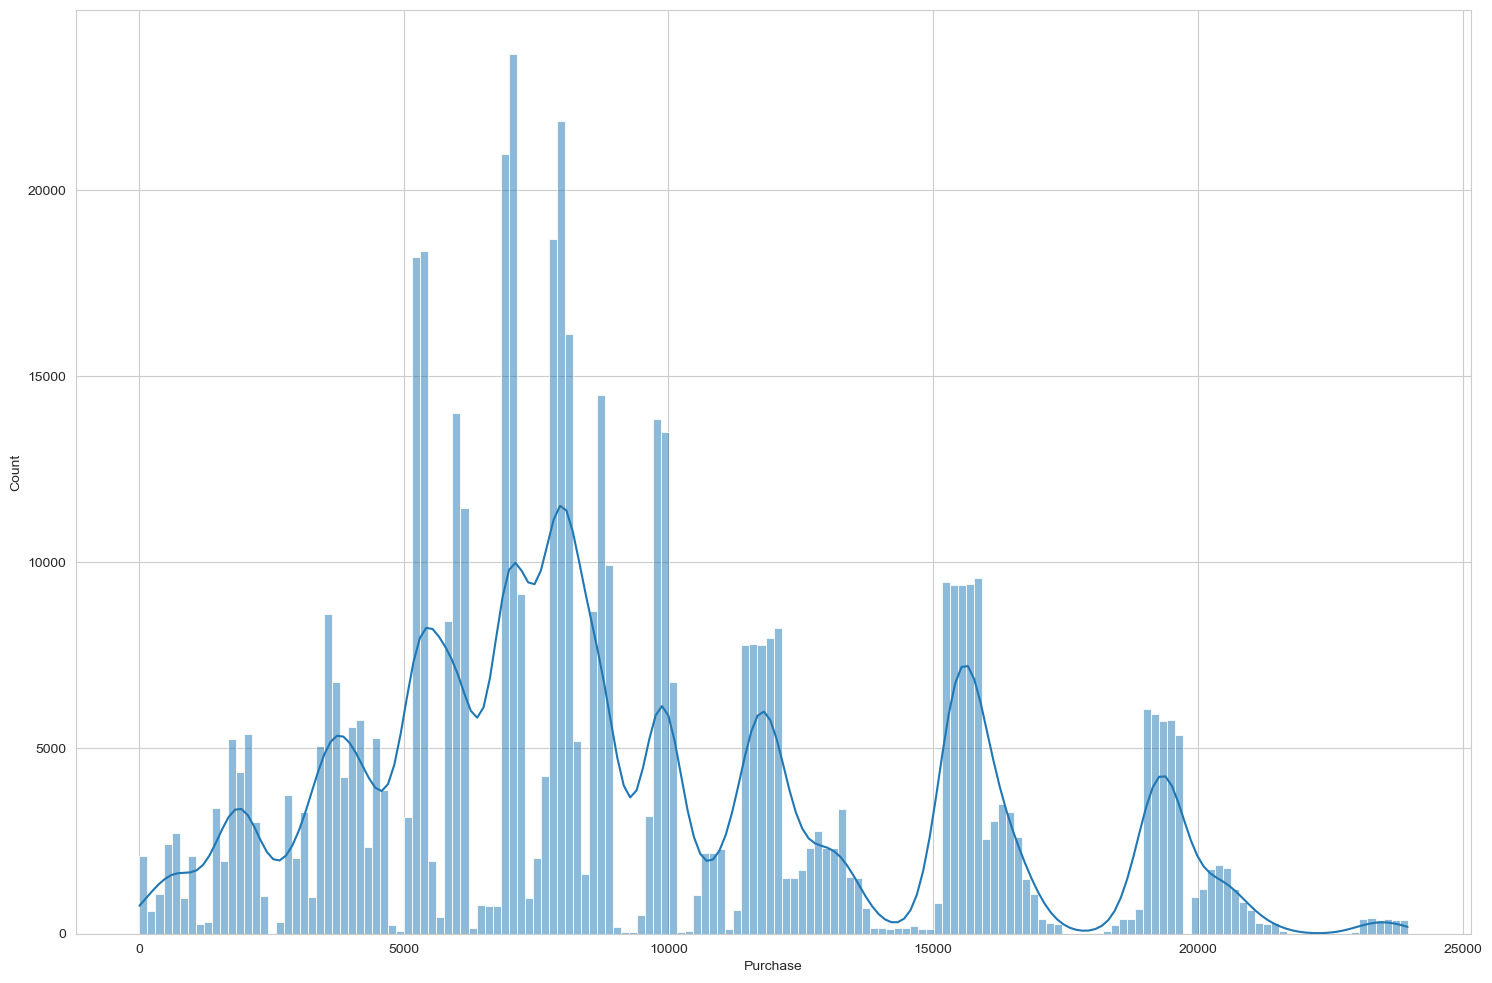

In [33]:
plt.figure(figsize=(18,12))
sns.histplot(Data['Purchase'],kde=True)
plt.show()

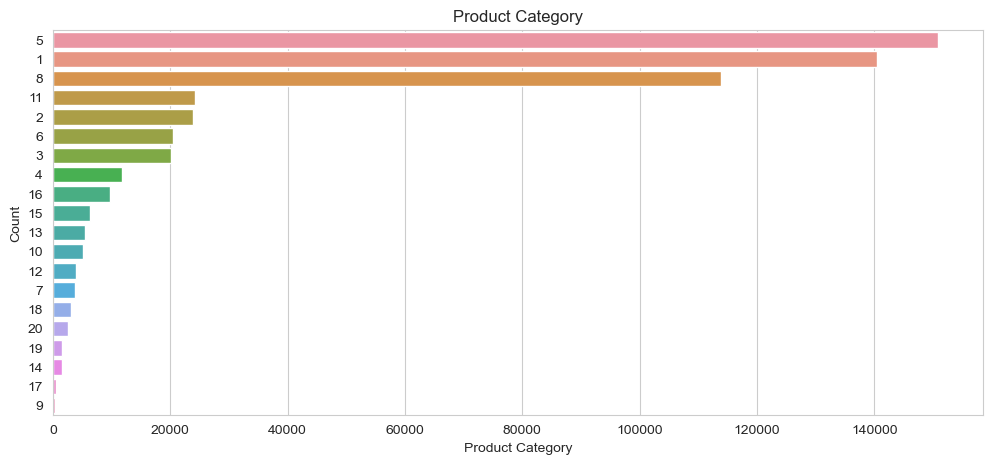

In [34]:
plt.figure(figsize=(12,5))
sns.countplot(y=Data['Product_Category'], order=Data['Product_Category'].value_counts().index)
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.title('Product Category')
plt.show()

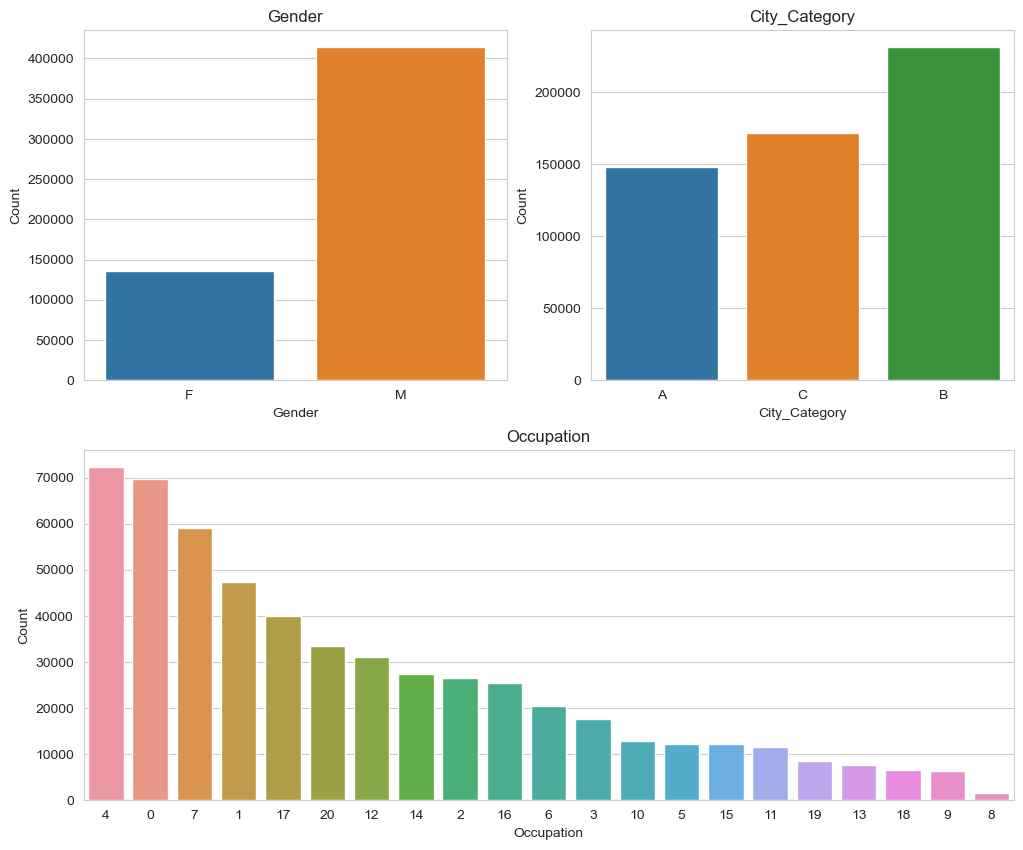

In [35]:
plt.figure(figsize=(12,10))
plt.subplot(2, 2, 1)
sns.countplot(x=Data['Gender'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender')

plt.subplot(2, 2, 2)
sns.countplot(x=Data['City_Category'])
plt.xlabel('City_Category')
plt.ylabel('Count')
plt.title('City_Category')

plt.subplot(2, 1, 2)  # This places the third subplot in the second row
sns.countplot(x=Data['Occupation'], order=Data['Occupation'].value_counts().index)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Occupation')
plt.show()

# Insights:
* The product categories 5, 1, and 8 have the highest purchase.
* Male purchasing power > female purchasing power.
* More users belongs to the B city region
* Max users are single as assumed 0 is single.
* The maximum purchase ranges from 5000 to 15000.
* Users ages 26–35 are 40%, users ages 36–45 are 20%, users ages 18–25 are 18%, users ages 46–50 are 8%, 
   users ages 51–55 are 7%, users ages 55+ are 4%, and very low users ages 0–17 are 2%.
* 35% stay in a city for 1 year, 19% stay in a city for 2 years, 17% stay in a city for 3 years, 
   and 15% stay in a city for 4+ years.

In [36]:
Data2 = Data
m1=Data2['Purchase'].quantile(0.05)
m2=Data2['Purchase'].quantile(0.95)
IQR=m2-m1
outliers = Data2['Purchase'][((Data2['Purchase']<(m1-1.5*IQR)) | (Data2['Purchase']>(m2+1.5*IQR)))]
print('Number of outliers:'+str(len(outliers)))
print('Min outlier value:'+ str(outliers.min()))
print('Max outlier value:'+ str(outliers.max()))

Number of outliers:0
Min outlier value:nan
Max outlier value:nan


# INSIGHT
* There are no outliers below 5% and above 95%. So No need of cliping the data.

# 3. Data Exploration
* What products are different age groups buying?
Hint: You can use histplot to find the relationship between products and age
groups
* Is there a relationship between age, marital status, and the amount spent?
Hint: You can do multivariate analysis to find the relationship between age,
marital status, and the amount spent
* Are there preferred product categories for different genders?
Hint: You can apply different hist plots for different genders

In [37]:
age_0_17=Data[Data['Age']=='0-17']
age_18_25=Data[Data['Age']=='18-25']
age_26_35=Data[Data['Age']=='26-35']
age_36_45=Data[Data['Age']=='36-45']
age_46_50=Data[Data['Age']=='46-50']
age_51_55=Data[Data['Age']=='51-55']
age_55=Data[Data['Age']=='55+']

Text(0.5, 1.0, 'Age group 55+')

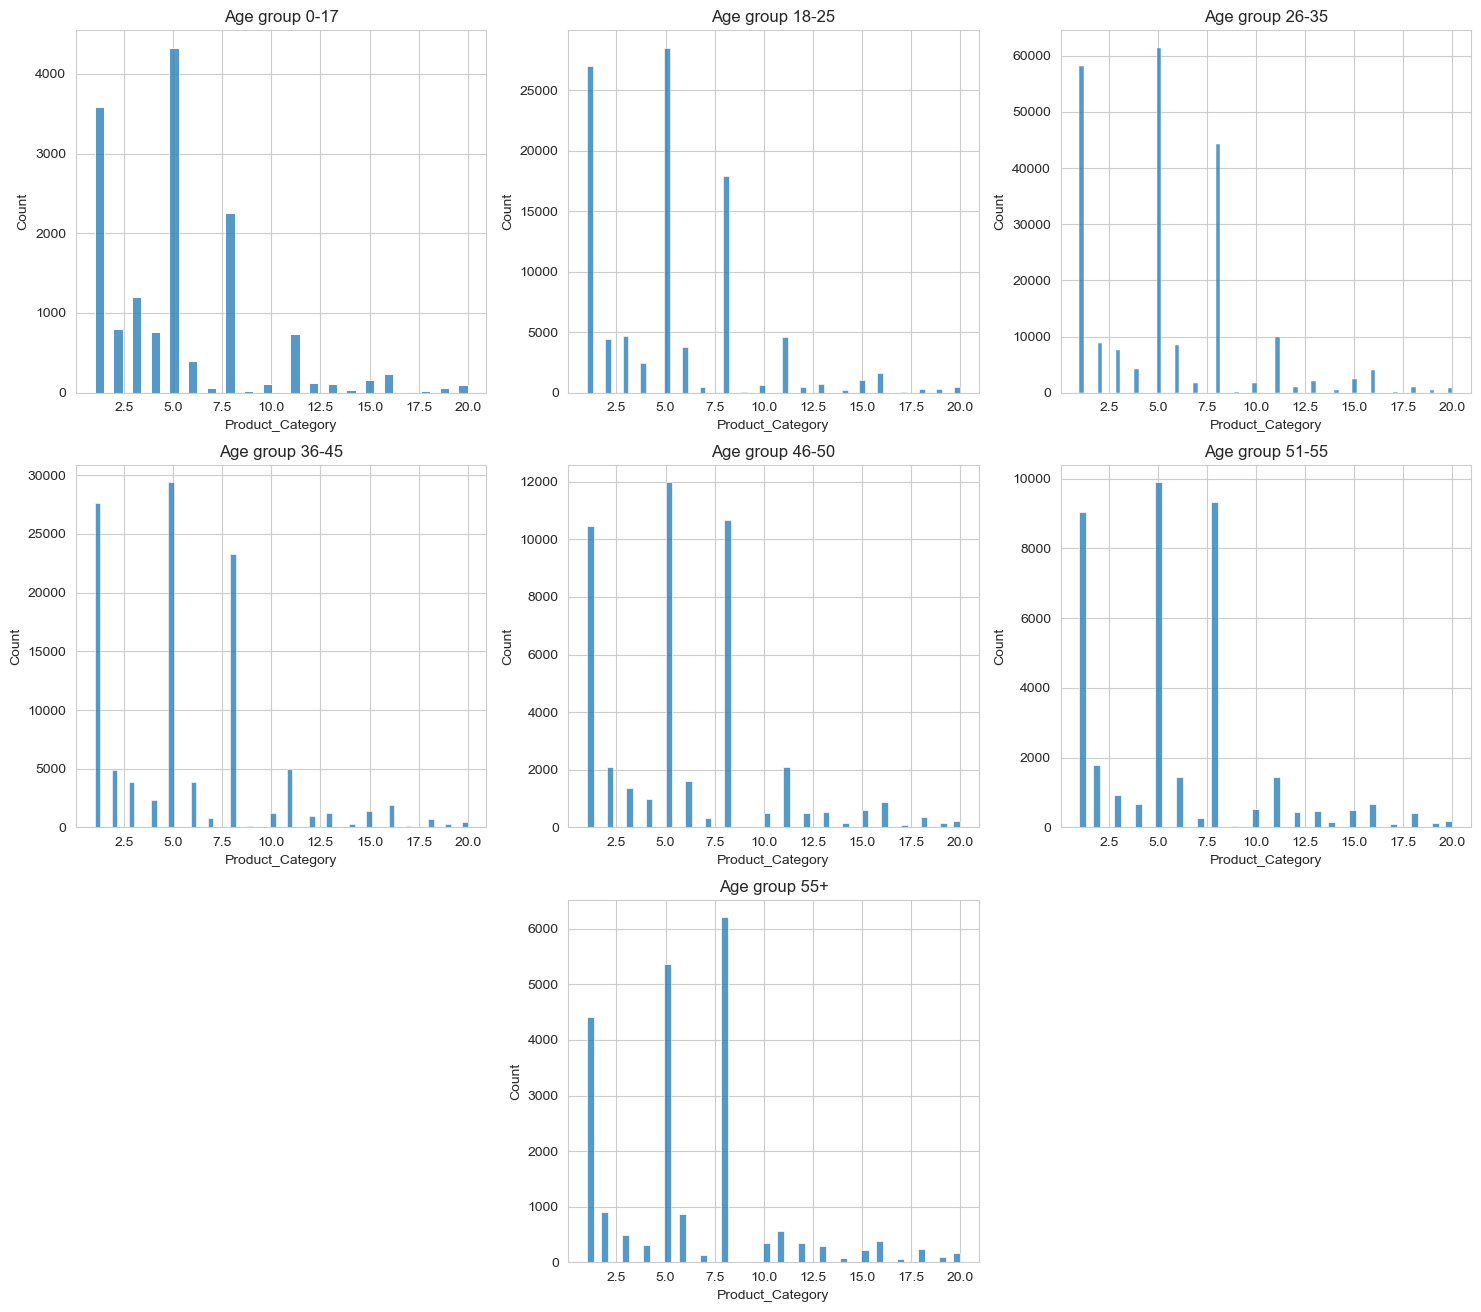

In [38]:
plt.figure(figsize=(18,16))
plt.subplot(3,3,1)
sns.histplot(x=age_0_17['Product_Category'])
plt.title('Age group 0-17')

plt.subplot(3,3,2)
sns.histplot(x=age_18_25['Product_Category'])
plt.title('Age group 18-25')

plt.subplot(3,3,3)
sns.histplot(x=age_26_35['Product_Category'])
plt.title('Age group 26-35')

plt.subplot(3,3,4)
sns.histplot(x=age_36_45['Product_Category'])
plt.title('Age group 36-45')

plt.subplot(3,3,5)
sns.histplot(x=age_46_50['Product_Category'])
plt.title('Age group 46-50')

plt.subplot(3,3,6)
sns.histplot(x=age_51_55['Product_Category'])
plt.title('Age group 51-55')

plt.subplot(3,3,8)
sns.histplot(x=age_55['Product_Category'])
plt.title('Age group 55+')

In [39]:
male=Data[Data['Gender']=='M']
female=Data[Data['Gender']=='F']

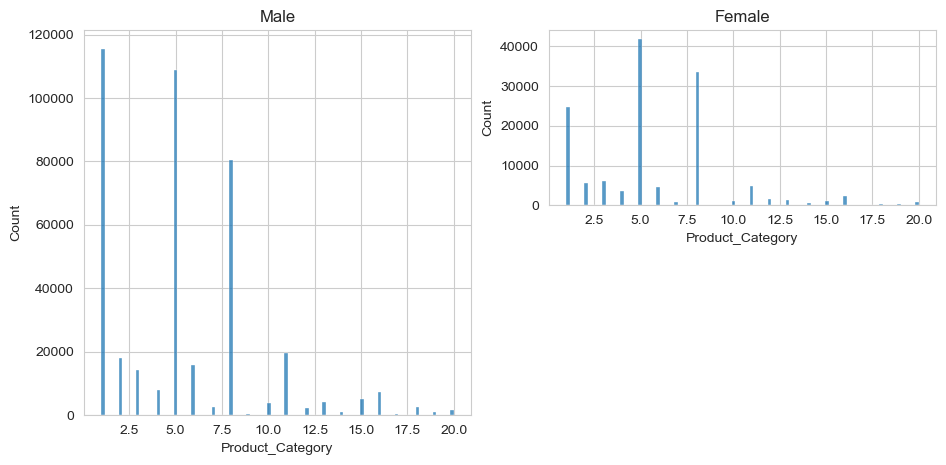

In [40]:
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
sns.histplot(x=male['Product_Category'])
plt.title('Male')

plt.subplot(2,2,2)
sns.histplot(x=female['Product_Category'])
plt.title('Female')
plt.show()

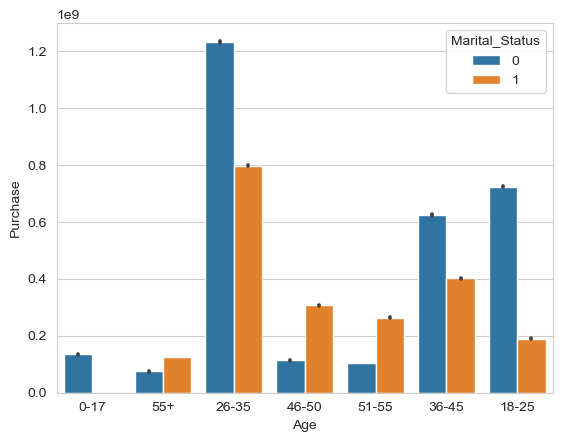

In [41]:
sns.barplot(data=Data, x='Age',y='Purchase', hue='Marital_Status', estimator=sum)
plt.show()

# Insight
* We can see all the age group is buying similar products mostly that is 1,5,8.
* From Age group 0 to 45 unmarried people were purchasing mostly but from age group 46 and above married people are purchasing more.
* For both Gender Male and Female the prefered product are 1,5 and 8.

# 4. How does gender affect the amount spent?

Hint: Use the central limit theorem and bootstrapping to compute the 95% confidence
intervals for the average amount spent per gender. First, compute the confidence
interval for whatever data is available, and then repeat the same with smaller sample
sizes - 300, 3000, and 30000.
* From the above calculated CLT answer the following questions.
   * Is the confidence interval computed using the entire dataset wider for
     one of the genders? Why is this the case?
   * How is the width of the confidence interval affected by the sample size?
   * Do the confidence intervals for different sample sizes overlap?
   * How does the sample size affect the shape of the distributions of the
     means?

In [42]:
Male_data=Data[Data['Gender']=='M']
Female_data=Data[Data['Gender']=='F']

In [43]:
#calculating mean of male and female purchase
mean_male=Male_data['Purchase'].mean()
mean_female=Female_data['Purchase'].mean()

#calculating standard deviation of male and female
std_male=Male_data['Purchase'].std()
std_female=Female_data['Purchase'].std()

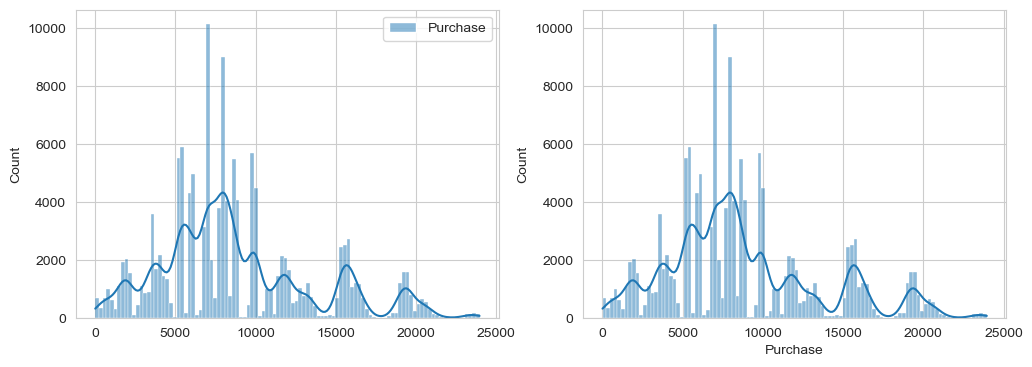

In [44]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot([Male_data['Purchase'],Female_data['Purchase']], kde=True)

plt.subplot(1,2,2)
sns.histplot(x=Female_data['Purchase'], kde=True)
plt.show()

In [45]:
#taking sample size
male_sample_size=[300,3000,30000]
female_sample_size=[300,3000,30000]

#creating empty list where we will store sample of sample mean for all sample size for both gender
male_300=[]
male_3000=[]
male_30000=[]
female_300=[]
female_3000=[]
female_30000=[]

#creating a iterable list for male and female mean list
male_lst=[male_300,male_3000,male_30000]
female_lst=[female_300,female_3000,female_30000]

#number of sample of sample choosen in this case studdy is 1000
sample_number=1000

#Listing mean of all sample gender wise
for j in range(3):
    male_sample_mean=0
    female_sample_mean=0
    for i in range (sample_number):
        male_sample_mean=Male_data.sample(male_sample_size[j])['Purchase'].mean()
        female_sample_mean=Female_data.sample(female_sample_size[j])['Purchase'].mean()
        male_lst[j].append(male_sample_mean)
        female_lst[j].append(female_sample_mean)

In [46]:
male_300=np.array(male_300)
male_3000=np.array(male_3000)
male_30000=np.array(male_30000)
female_300=np.array(female_300)
female_3000=np.array(female_3000)
female_30000=np.array(female_30000)

In [47]:
#mean and std of male sample of sample mean
male_sample_sample_mean1=male_300.mean()
male_sample_sample_std1=std_male/np.sqrt(sample_number)

#cal confidence interval
print('CI for male 300 sample',norm.interval(confidence=0.95, loc=male_sample_sample_mean1, scale=male_sample_sample_std1))

#mean and std of male sample of sample mean
male_sample_sample_mean2=male_3000.mean()
male_sample_sample_std2=std_male/np.sqrt(sample_number)

#cal confidence interval
print('CI for male 3000 sample',norm.interval(confidence=0.95, loc=male_sample_sample_mean2, scale=male_sample_sample_std2))

#mean and std of male sample of sample mean
male_sample_sample_mean3=male_30000.mean()
male_sample_sample_std3=std_male/np.sqrt(sample_number)

#cal confidence interval
print('CI for male 30000 sample',norm.interval(confidence=0.95, loc=male_sample_sample_mean3, scale=male_sample_sample_std3))

CI for male 300 sample (9141.991151694318, 9773.213494972351)
CI for male 3000 sample (9122.667747360983, 9753.890090639017)
CI for male 30000 sample (9123.459588527649, 9754.681931805682)


In [48]:
#mean and std of male sample of sample mean
female_sample_sample_mean1=female_300.mean()
female_sample_sample_std1=std_female/np.sqrt(sample_number)

#cal confidence interval
print('CI for female 300 sample',norm.interval(confidence=0.95, loc=female_sample_sample_mean1, scale=female_sample_sample_std1))

#mean and std of male sample of sample mean
female_sample_sample_mean2=female_3000.mean()
female_sample_sample_std2=std_female/np.sqrt(sample_number)

#cal confidence interval
print('CI for female 3000 sample',norm.interval(confidence=0.95, loc=female_sample_sample_mean2, scale=female_sample_sample_std2))

#mean and std of male sample of sample mean
female_sample_sample_mean3=female_30000.mean()
female_sample_sample_std3=std_female/np.sqrt(sample_number)

#cal confidence interval
print('CI for female 30000 sample',norm.interval(confidence=0.95, loc=female_sample_sample_mean3, scale=female_sample_sample_std3))

CI for female 300 sample (8437.553125612689, 9028.494627720644)
CI for female 3000 sample (8436.16214261269, 9027.103644720644)
CI for female 30000 sample (8438.583772379356, 9029.52527448731)


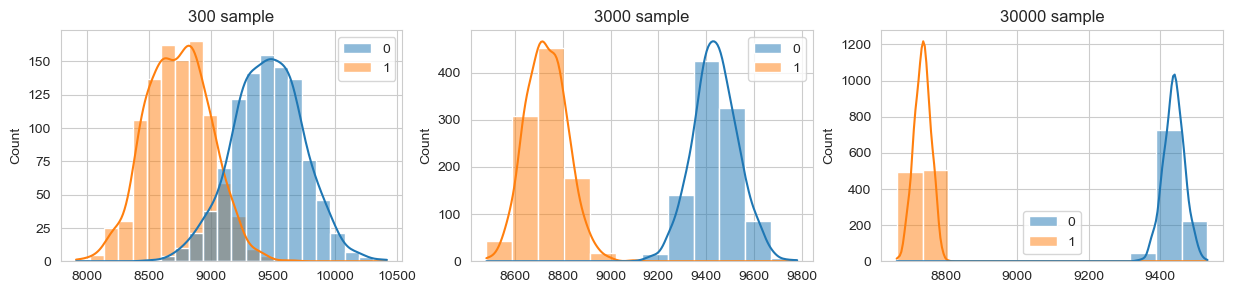

In [49]:
plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
sns.histplot([male_300,female_300], kde=True)
plt.title('300 sample')

plt.subplot(1,3,2)
sns.histplot([male_3000,female_3000], kde=True)
plt.title('3000 sample')

plt.subplot(1,3,3)
sns.histplot([male_30000,female_30000], kde=True)
plt.title('30000 sample')
plt.show()

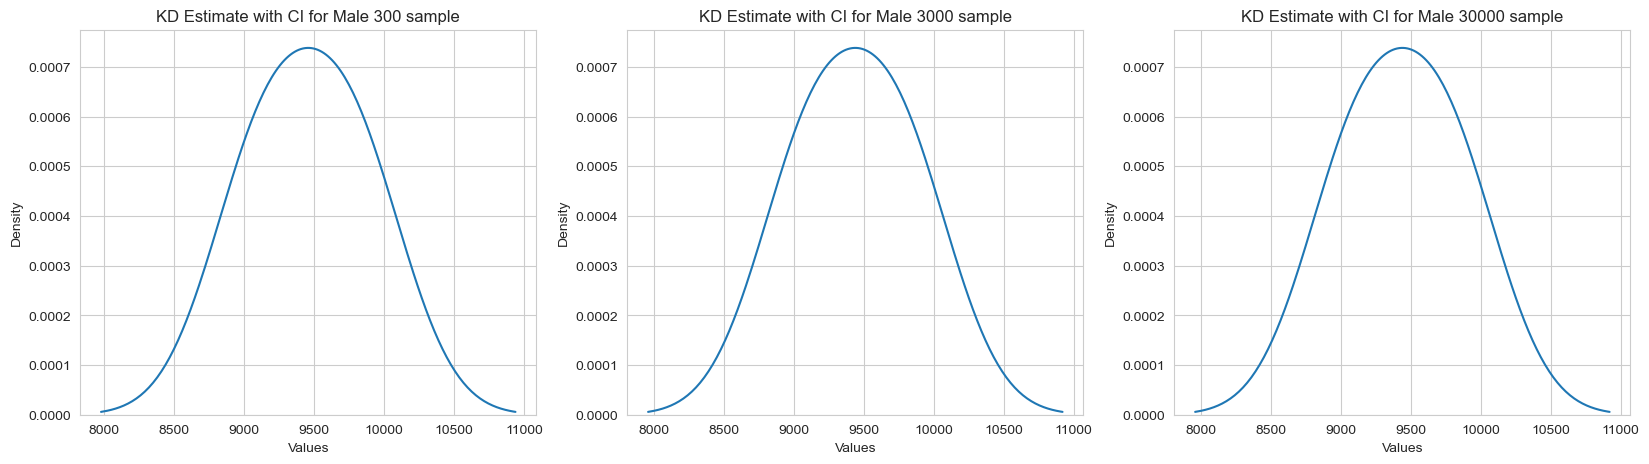

In [50]:
# Calculate the confidence interval for male and presenting it on the graph
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.kdeplot(norm.interval(confidence=0.95, loc=male_sample_sample_mean1, scale=male_sample_sample_std1))
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('KD Estimate with CI for Male 300 sample')


plt.subplot(1,3,2)
sns.kdeplot(norm.interval(confidence=0.95, loc=male_sample_sample_mean2, scale=male_sample_sample_std2))
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('KD Estimate with CI for Male 3000 sample')




plt.subplot(1,3,3)
sns.kdeplot(norm.interval(confidence=0.95, loc=male_sample_sample_mean3, scale=male_sample_sample_std3))
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('KD Estimate with CI for Male 30000 sample')
plt.show()

# Insight
* For the both the gender histplot of sample of sample mean is almost similar but female plot look little fat coz the amount purchase for them is relatively lower and wider in range.
* Width of the confidence interval has reduce as we incresed the number of sample from 300 to 30000.
* There is amount of overlap for 300 samples but then for 3000 and  30000 number sample no overlap seen.
* With increase in sample size the hist plot got thinner an sharper which indicate reduction in deviation.

# 5. How does Marital_Status affect the amount spent?
Hint: Use the central limit theorem and bootstrapping to compute the 95% confidence
intervals for the average amount spent per Marital_Status. First, compute the
confidence interval for whatever data is available, and then repeat the same with
smaller sample sizes - 300, 3000, and 30000.

* a. From the above calculated CLT answer the following questions.
     * Is the confidence interval computed using the entire dataset wider for
       one of the genders? Why is this the case?
     * How is the width of the confidence interval affected by the sample size?
     * Do the confidence intervals for different sample sizes overlap?
     * How does the sample size affect the shape of the distributions of the
       means?

In [51]:
Married_data=Data[Data['Marital_Status']==1]
Unmarried_data=Data[Data['Marital_Status']==0]

In [52]:
#calculating mean of male and female purchase
mean_Married_data=Married_data['Purchase'].mean()
mean_Unmarried_data=Unmarried_data['Purchase'].mean()

#calculating standard deviation of male and female
std_Married_data=Married_data['Purchase'].std()
std_Unmarried_data=Unmarried_data['Purchase'].std()

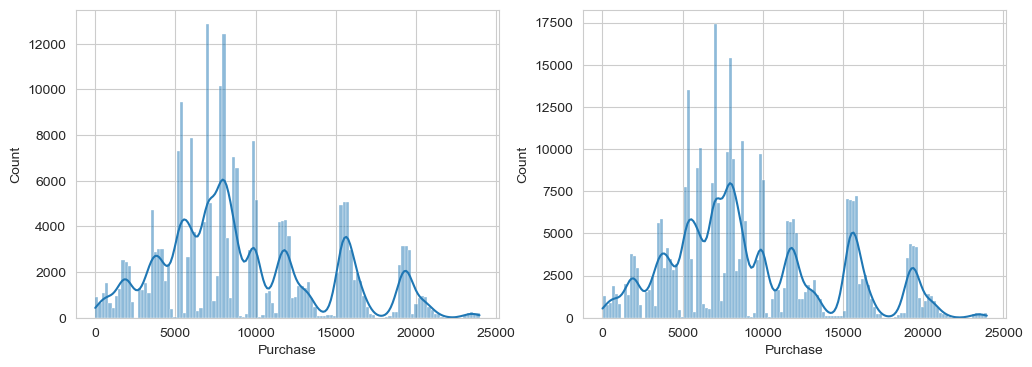

In [53]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(x=Married_data['Purchase'],kde=True)

plt.subplot(1,2,2)
sns.histplot(x=Unmarried_data['Purchase'], kde=True)
plt.show()


In [54]:
#taking sample size
Married_sample_size=[300,3000,30000]
Unmarried_sample_size=[300,3000,30000]

#creating empty list where we will store sample of sample mean for all sample size for both gender
Married_300=[]
Married_3000=[]
Married_30000=[]
Unmarried_300=[]
Unmarried_3000=[]
Unmarried_30000=[]

#creating a iterable list for male and female mean list
Married_lst=[Married_300,Married_3000,Married_30000]
Unmarried_lst=[Unmarried_300,Unmarried_3000,Unmarried_30000]

#number of sample of sample choosen in this case studdy is 1000
sample_number=1000

#Listing mean of all sample gender wise
for j in range(3):
    Married_sample_mean=0
    Unmarried_sample_mean=0
    for i in range (sample_number):
        Married_sample_mean=Married_data.sample(Married_sample_size[j])['Purchase'].mean()
        Unmarried_sample_mean=Unmarried_data.sample(Unmarried_sample_size[j])['Purchase'].mean()
        Married_lst[j].append(Married_sample_mean)
        Unmarried_lst[j].append(Unmarried_sample_mean)

In [55]:
Married_300=np.array(Married_300)
Married_3000=np.array(Married_3000)
Married_30000=np.array(Married_30000)
Unmarried_300=np.array(Unmarried_300)
Unmarried_3000=np.array(Unmarried_3000)
Unmarried_30000=np.array(Unmarried_30000)

In [56]:
#mean and std of male sample of sample mean
Married_sample_sample_mean1=Married_300.mean()
Married_sample_sample_std1=std_Married_data/np.sqrt(sample_number)

#cal confidence interval
print('CI for Married 300 sample',norm.interval(confidence=0.95, loc=Married_sample_sample_mean1, scale=Married_sample_sample_std1))

#mean and std of male sample of sample mean
Married_sample_sample_mean2=Married_3000.mean()
Married_sample_sample_std2=std_Married_data/np.sqrt(sample_number)

#cal confidence interval
print('CI for Married 3000 sample',norm.interval(confidence=0.95, loc=Married_sample_sample_mean2, scale=Married_sample_sample_std2))

#mean and std of male sample of sample mean
Married_sample_sample_mean3=Married_30000.mean()
Married_sample_sample_std3=std_Married_data/np.sqrt(sample_number)

#cal confidence interval
print('CI for Married 30000 sample',norm.interval(confidence=0.95, loc=Married_sample_sample_mean3, scale=Married_sample_sample_std3))

CI for Married 300 sample (8952.707252766204, 9574.596867233797)
CI for Married 3000 sample (8952.56823943287, 9574.457853900463)
CI for Married 30000 sample (8949.188525066204, 9571.078139533796)


In [57]:
#mean and std of male sample of sample mean
Unmarried_sample_sample_mean1=Unmarried_300.mean()
Unmarried_sample_sample_std1=std_Unmarried_data/np.sqrt(sample_number)

#cal confidence interval
print('CI for Unmarried 300 sample',norm.interval(confidence=0.95, loc=Unmarried_sample_sample_mean1, scale=Unmarried_sample_sample_std1))

#mean and std of male sample of sample mean
Unmarried_sample_sample_mean2=Unmarried_3000.mean()
Unmarried_sample_sample_std2=std_Unmarried_data/np.sqrt(sample_number)

#cal confidence interval
print('CI for Unmarried 3000 sample',norm.interval(confidence=0.95, loc=Unmarried_sample_sample_mean2, scale=Unmarried_sample_sample_std2))

#mean and std of male sample of sample mean
Unmarried_sample_sample_mean3=Unmarried_30000.mean()
Unmarried_sample_sample_std3=std_Unmarried_data/np.sqrt(sample_number)

#cal confidence interval
print('CI for Unmarried 30000 sample',norm.interval(confidence=0.95, loc=Unmarried_sample_sample_mean3, scale=Unmarried_sample_sample_std3))

CI for Unmarried 300 sample (8946.223330485993, 9569.408376180674)
CI for Unmarried 3000 sample (8953.429988819325, 9576.615034514007)
CI for Unmarried 30000 sample (8952.998409819325, 9576.183455514007)


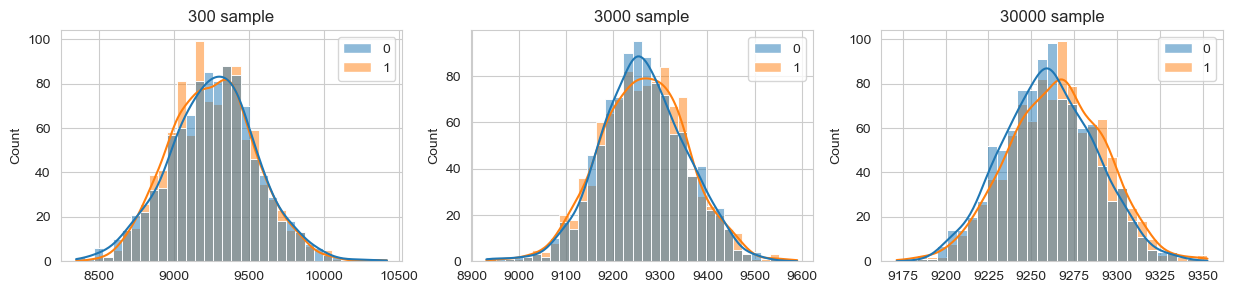

In [58]:
plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
sns.histplot([Married_300,Unmarried_300], kde=True)
plt.title('300 sample')

plt.subplot(1,3,2)
sns.histplot([Married_3000,Unmarried_3000], kde=True)
plt.title('3000 sample')

plt.subplot(1,3,3)
sns.histplot([Married_30000,Unmarried_30000], kde=True)
plt.title('30000 sample')
plt.show()

# Insight
* For both married and unmarried people the the width of CI is almost same.
* There is not such major change in width in CI with with increase in sample size from 300 to 30000.
* The CI of all three sample size overlap.
* Sample size has not affected the shape of distribution significantly.

# 6. How does Age affect the amount spent?

Hint: Use the central limit theorem and bootstrapping to compute the 95% confidence
intervals for the average amount spent per Marital_Status. First, compute the
confidence interval for whatever data is available, and then repeat the same with
smaller sample sizes - 300, 3000, and 30000.
* From the above calculated CLT answer the following questions.
    * Is the confidence interval computed using the entire dataset wider for
      one of the genders? Why is this the case?
    * How is the width of the confidence interval affected by the sample size?
    * Do the confidence intervals for different sample sizes overlap?
    * How does the sample size affect the shape of the distributions of the
      means?

### We have seen that age group 26-35 and 36-45 have made most purhase.
### Lets take age group 26-35 and 36-45 for analysis. (Several other age group is also there)

Lets say age group 1 ---> 26-35 and group 2 ---->36-45

In [59]:
group1_data=Data[Data['Age']=='26-35']
group2_data=Data[Data['Age']=='36-45']

In [60]:
#calculating mean of male and female purchase
mean_group1_data=group1_data['Purchase'].mean()
mean_group2_data=group2_data['Purchase'].mean()

#calculating standard deviation of male and female
std_group1_data=group1_data['Purchase'].std()
std_group2_data=group2_data['Purchase'].std()

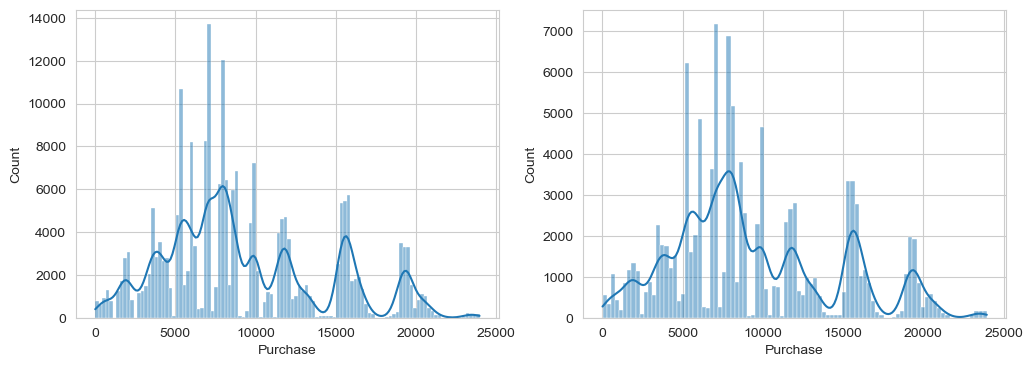

In [61]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(x=group1_data['Purchase'],kde=True)

plt.subplot(1,2,2)
sns.histplot(x=group2_data['Purchase'], kde=True)
plt.show()


In [62]:
#taking sample size
group1_sample_size=[300,3000,30000]
group2_sample_size=[300,3000,30000]

#creating empty list where we will store sample of sample mean for all sample size for both gender
group1_300=[]
group1_3000=[]
group1_30000=[]
group2_300=[]
group2_3000=[]
group2_30000=[]

#creating a iterable list for male and female mean list
group1_lst=[group1_300,group1_3000,group1_30000]
group2_lst=[group2_300,group2_3000,group2_30000]

#number of sample of sample choosen in this case studdy is 1000
sample_number=1000

#Listing mean of all sample gender wise
for j in range(3):
    group1_sample_mean=0
    group2_sample_mean=0
    for i in range (sample_number):
        group1_sample_mean=group1_data.sample(group1_sample_size[j])['Purchase'].mean()
        group2_sample_mean=group2_data.sample(group2_sample_size[j])['Purchase'].mean()
        group1_lst[j].append(group1_sample_mean)
        group2_lst[j].append(group2_sample_mean)

In [63]:
group1_300=np.array(Married_300)
group1_3000=np.array(Married_3000)
group1_30000=np.array(Married_30000)
group2_300=np.array(Unmarried_300)
group2_3000=np.array(Unmarried_3000)
group2_30000=np.array(Unmarried_30000)

In [64]:
#mean and std of male sample of sample mean
group1_sample_sample_mean1=group1_300.mean()
group1_sample_sample_std1=std_group1_data/np.sqrt(sample_number)

#cal confidence interval
print('CI for group1 300 sample',norm.interval(confidence=0.95, loc=group1_sample_sample_mean1, scale=group1_sample_sample_std1))

#mean and std of male sample of sample mean
group1_sample_sample_mean2=group1_3000.mean()
group1_sample_sample_std2=std_group1_data/np.sqrt(sample_number)

#cal confidence interval
print('CI for group1 3000 sample',norm.interval(confidence=0.95, loc=group1_sample_sample_mean2, scale=group1_sample_sample_std2))

#mean and std of male sample of sample mean
group1_sample_sample_mean3=group1_30000.mean()
group1_sample_sample_std3=std_Married_data/np.sqrt(sample_number)

#cal confidence interval
print('CI for group1 30000 sample',norm.interval(confidence=0.95, loc=group1_sample_sample_mean3, scale=group1_sample_sample_std3))

CI for group1 300 sample (8953.102066837242, 9574.202053162759)
CI for group1 3000 sample (8952.963053503909, 9574.063039829425)
CI for group1 30000 sample (8949.188525066204, 9571.078139533796)


In [65]:
#mean and std of male sample of sample mean
group2_sample_sample_mean1=group2_300.mean()
group2_sample_sample_std1=std_group2_data/np.sqrt(sample_number)

#cal confidence interval
print('CI for group2 300 sample',norm.interval(confidence=0.95, loc=group2_sample_sample_mean1, scale=group2_sample_sample_std1))

#mean and std of male sample of sample mean
group2_sample_sample_mean2=group2_3000.mean()
group2_sample_sample_std2=std_group2_data/np.sqrt(sample_number)

#cal confidence interval
print('CI for group2 3000 sample',norm.interval(confidence=0.95, loc=group2_sample_sample_mean2, scale=group2_sample_sample_std2))

#mean and std of male sample of sample mean
group2_sample_sample_mean3=group2_30000.mean()
group2_sample_sample_std3=std_group2_data/np.sqrt(sample_number)

#cal confidence interval
print('CI for group2 30000 sample',norm.interval(confidence=0.95, loc=group2_sample_sample_mean3, scale=group2_sample_sample_std3))

CI for group2 300 sample (8946.497526535833, 9569.134180130834)
CI for group2 3000 sample (8953.704184869166, 9576.340838464166)
CI for group2 30000 sample (8953.272605869166, 9575.909259464166)


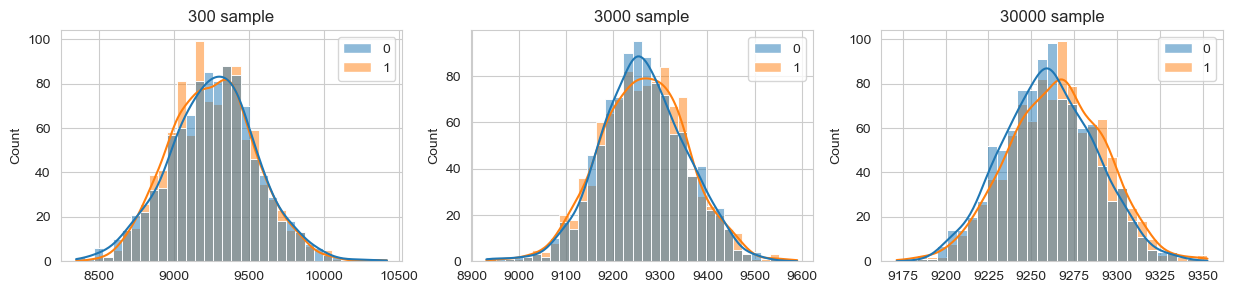

In [69]:
plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
sns.histplot([group1_300,group2_300], kde=True)
plt.title('300 sample')

plt.subplot(1,3,2)
sns.histplot([group1_3000,group2_3000], kde=True)
plt.title('3000 sample')

plt.subplot(1,3,3)
sns.histplot([group1_30000,group2_30000], kde=True)
plt.title('30000 sample')
plt.show()

# Insight
* For both age group 26-35 and 36-45 people the the width of CI is almost same.
* There is not such major change in width in CI with with increase in sample size from 300 to 30000.
* The CI of all three sample size overlap.
* Sample size has not affected the shape of distribution significantly.

# 7. Create a report
a. Report whether the confidence intervals for the average amount spent by males
and females (computed using all the data) overlap. How can Walmart leverage
this conclusion to make changes or improvements?



# Report

* Confidence intervals of male and female are not overlaping. Where the mean amount purchase more for male and have more count also.
* It suggest the males are purchasing more them females could be due many reason like social, professional etc.
* Company should give more importance to these male customer segment to keep its buisness smooth and growing.
* Also if they can do something to encourage and promote their female customer at their outlet they can expect to grow sharp steep.

b. Report whether the confidence intervals for the average amount spent by
married and unmarried (computed using all the data) overlap. How can Walmart
leverage this conclusion to make changes or improvements?

# Report

* Confidence intervals of married and unmarried are overlaping. This indicate the purchasing behaviour is alomost same for both.
* Company should conclude from this that both the married and unmarrried section is of same importance to the company.
* All the Ads and promotional activity should reach both of these category in future scope to grow.
* These will help company to keep its firm hold in market.

c. Report whether the confidence intervals for the average amount spent by
different age groups (computed using all the data) overlap. How can Walmart
leverage this conclusion to make changes or improvements? (Age group choosen for checkig 26-35 & 36-45)

# Report

* Confidence intervals of marriedage group 1 26-35 and group 2 36-45 are overlaping. This indicate the purchasing behaviour is alomost same for both.
* Company should conclude from this that both the group 1 and group 2 section is of same importance to the company.
* All the Ads and promotional activity should reach both of these category in future scope to grow.
* These will help company to keep its firm hold in market.

# Recommendations

* Men spend more money than women, so the company should focus on retaining male customers and getting more male customers.
* Product Category: 5, 1, and 8 have the highest purchasing frequency.
   * It means the products in these categories are liked more by customers.
   * The company can focus on selling more of these products.
* Product Category: 11, 2, and 6, 3 have almost close competition in purchasing. 
   * The company can focus on selling more of these products.
* Unmarried customers spend more money compared to married customers. So the company should focus on retaining the unmarried customers and getting more unmarried customers.
* 86% of purchases are done by customers whose ages are between 18 and 45. So the company should focus on the acquisition of customers who are aged 18–45.
* Customers living in City_Category C spend more money than other customers living in B or A. Selling more products in City Category C will help the company increase sales.